# Practica 6 (Support Vector Machines)
### Aprendizaje automático y big data
##### _Alberto García Doménech - Pablo Daurell Marina_    
---

In [177]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import SVC
from scipy.io import loadmat

## 1 - Kernel lineal

Para empezar, vamos a probar a entrenar una SVM con una función de Kernel lineal. Por tanto vamos a usar un conjunto de datos linealmente separable.   

- Cargamos y visualizamos los datos:

In [104]:
data = loadmat('p6-data/ex6data1.mat')
X = data['X']
y = data['y']

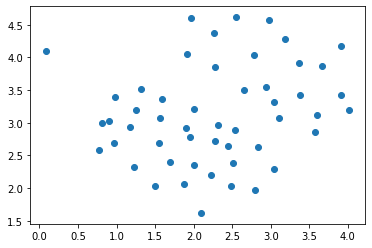

In [105]:
plt.scatter(X[:,0], X[:, 1])
plt.show()

- Visualizamos que datos pertenecen a cada clase:

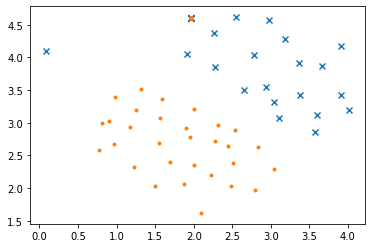

In [106]:
pos = np.where(y == 1)
plt.scatter(X[pos, 0], X[pos, 1], marker='x')
pos = np.where(y == 0)
plt.scatter(X[pos, 0], X[pos, 1], marker='.')
plt.show()

In [107]:
def visualize_boundary(X, y, svm, title):
    x1 = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)
    x2 = np.linspace(X[:, 1].min(), X[:, 1].max(), 100)
    x1, x2 = np.meshgrid(x1, x2)
    yp = svm.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape)
    pos = (y == 1).ravel()
    neg = (y == 0).ravel()
    plt.figure()
    plt.scatter(X[pos, 0], X[pos, 1], marker='x')
    plt.scatter(
    X[neg, 0], X[neg, 1], marker='.')
    plt.contour(x1, x2, yp)
    plt.title(title)
    plt.show()
    

Ahora vamos a entrenar una SVM usando la clase ```SVC``` de ```Sklearn``` .    
- Vemos que resultados obtenemos con C = 1 y con C = 100

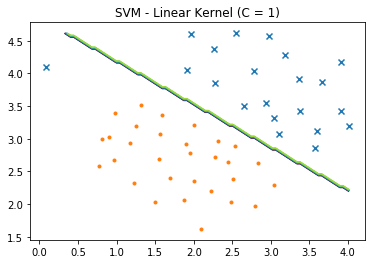

In [108]:
svm = SVC(kernel='linear', C=1.0)
svm.fit(X, y.ravel())

visualize_boundary(X, y, svm, "SVM - Linear Kernel (C = 1)")

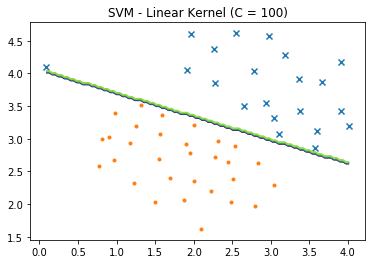

In [109]:
svm = SVC(kernel='linear', C=100.0)
svm.fit(X, y.ravel())

visualize_boundary(X, y, svm, "SVM - Linear Kernel (C = 100)")

> Vemos que con C = 1 tenemos una frontera de separación más generalizada y con amplios márgenes, mientras que con C = 100 quizá este sobreajustando demasiado la frontera.

## 1.2 - Kernel gaussiano

Ahora vamos a entrenar una SVM con una función de kernel gaussiana. Vamos a utilizar un conjunto de datos más complejo, que no es linealmente separable.

- Cargamos y visualizamos los datos:

In [110]:
data = loadmat('p6-data/ex6data2.mat')
X = data['X']
y = data['y']

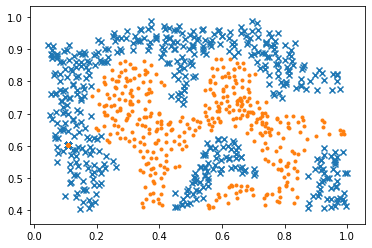

In [111]:
pos = np.where(y == 1)
plt.scatter(X[pos, 0], X[pos, 1], marker='x')
pos = np.where(y == 0)
plt.scatter(X[pos, 0], X[pos, 1], marker='.')
plt.show()

- Entrenamos la SVM:   
(Utilizamos la funcion de kernel 'rbf' que es equivalente al la gaussiana pero sustituyendo la constante $1/\sigma^2$ por $\gamma$

In [112]:
C = 1
sigma = 0.1

svm = SVC(kernel='rbf', C=C, gamma=1/(2* sigma**2))
svm.fit(X, y.ravel())

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=49.99999999999999,
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

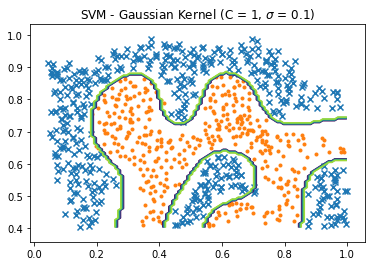

In [114]:
visualize_boundary(X, y, svm, "SVM - Gaussian Kernel (C = 1, $\sigma$ = 0.1)")

> Con C = 1 y $\sigma$ = 0.1 obtenemos una frontera de separación bastante ajustada a los datos.

## 1.3 - Elección de los parámetros

En esta parte vamos a buscar los valores de C y $\sigma$ más adecuados. Para esto haremos uso de un conjunto intermedio de validación.    

- Cargamos y visualizamos los datos:

In [119]:
data = loadmat('p6-data/ex6data3.mat')
X = data['X']
y = data['y']
Xval = data['Xval']
yval = data['yval']

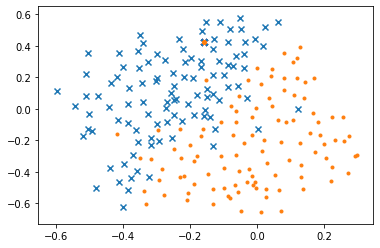

In [120]:
pos = np.where(y == 1)
plt.scatter(X[pos, 0], X[pos, 1], marker='x')
pos = np.where(y == 0)
plt.scatter(X[pos, 0], X[pos, 1], marker='.')
plt.show()

Ahora entrenamos distintas SVMs con distintas configuraciones para C y $\sigma$

In [170]:
from sklearn.metrics import confusion_matrix as cm

C_list = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30]
sigma_list = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30]

C_vals = []
sigma_vals = []
precission_vals = []

for C in C_list:
    for sigma in sigma_list:
        svm = SVC(kernel='rbf', C=C, gamma=1 / (2 * sigma**2))
        svm.fit(X, y.ravel())
        y_pred = svm.predict(Xval)
        
        tp, fn ,fp ,tn = cm(y_pred, yval).ravel()
        precission = tp / (tp + fp)
        
        C_vals.append(C)
        sigma_vals.append(sigma)
        precission_vals.append(precission)
        
        print("C =",C,"sigma =", sigma)
        print("precission =", precission, "\n")

C = 0.01 sigma = 0.01
precission = 0.0 

C = 0.01 sigma = 0.03
precission = 0.0 

C = 0.01 sigma = 0.1
precission = 0.0 

C = 0.01 sigma = 0.3
precission = 0.0 

C = 0.01 sigma = 1
precission = 0.0 

C = 0.01 sigma = 3
precission = 0.0 

C = 0.01 sigma = 10
precission = 0.0 

C = 0.01 sigma = 30
precission = 0.0 

C = 0.03 sigma = 0.01
precission = 0.0 

C = 0.03 sigma = 0.03
precission = 0.0 

C = 0.03 sigma = 0.1
precission = 0.02654867256637168 

C = 0.03 sigma = 0.3
precission = 0.8584070796460177 

C = 0.03 sigma = 1
precission = 0.34513274336283184 

C = 0.03 sigma = 3
precission = 0.0 

C = 0.03 sigma = 10
precission = 0.0 

C = 0.03 sigma = 30
precission = 0.0 

C = 0.1 sigma = 0.01
precission = 0.0 

C = 0.1 sigma = 0.03
precission = 0.0 

C = 0.1 sigma = 0.1
precission = 0.9646017699115044 

C = 0.1 sigma = 0.3
precission = 0.9203539823008849 

C = 0.1 sigma = 1
precission = 0.8053097345132744 

C = 0.1 sigma = 3
precission = 0.0 

C = 0.1 sigma = 10
precission = 0.0 

C = 0.

> De todas las configuraciones, vamos a ver cuál ha obtenido mejor resultado

In [175]:
best_val = np.where(precission_vals == np.max(precission_vals))[0][0]
print("Mejor precision: ", precission_vals[best_val])
print("Mejor valor de C: ", C_vals[best_val])
print("Mejor valor de sigma: ", sigma_vals[best_val])

svm = SVC(kernel='rbf', C=C_vals[best_val], gamma=1 / (2 * sigma_vals[best_val]**2))
svm.fit(X,y.ravel())

Mejor precision:  0.9734513274336283
Mejor valor de C:  3
Mejor valor de sigma:  0.1


SVC(C=3, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=49.99999999999999,
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

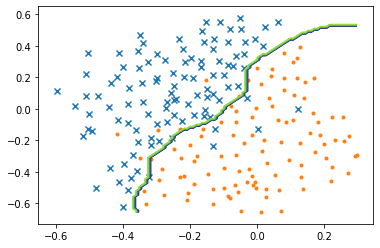

In [176]:
visualize_boundary(X, y, svm, "")

> Vemos que usar C=3 y sigma=0.1 nos da una precision del 97% y obtenemos una frontera que se ajusta muy bien a los datos.

## 2 - Deteccion de spam

En esta parte vamos a entrenar SVMs para que intenten clasificar correos como spam o no spam.

In [217]:
from process_email import email2TokenList
from get_vocab_dict import getVocabDict
import codecs
import os

In [250]:
# Cargamos el diccionario que usaremos para vectorizar cada mail
vocab_dict = getVocabDict()
len(vocab_dict)

1899

In [249]:
# Contamos el numero de mensajes de cada categoria
spam_num = len([name for name in os.listdir('./spam') if os.path.isfile(os.path.join('./spam', name))])
easy_num = len([name for name in os.listdir('./easy_ham') if os.path.isfile(os.path.join('./easy_ham', name))])
hard_num = len([name for name in os.listdir('./hard_ham') if os.path.isfile(os.path.join('./hard_ham', name))])

In [254]:
# Creamos un vector que tendra 1899 filas (una por cada palabra) y 3301 columnas (una por cada mail)
# Si un mail contiene una palabra el vector valdra 1 y si no la contiene valdra 0
word_vector = np.zeros([len(vocab_dict), spam_num+easy_num+hard_num])
np.shape(words_vector)

(1899, 3301)

In [258]:
# 
for i, file in enumerate(os.listdir('./spam')):
    email_contents = codecs.open('./spam/{}'.format(file), 'r', encoding='utf-8', errors='ignore').read()
    email = email2TokenList(email_contents)
    for w in email:
        if w in vocab_dict: 
            word_vector[] = 1

SyntaxError: unexpected EOF while parsing (<ipython-input-258-ada4a8d9ac48>, line 7)